# Competição do Kaggle para previsão de receita de filmes

In [77]:
#Bibliotecas para manipulação de dados e machine learning

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import ast
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Analisar Investimento, Linguagem, Gênero, Popularidade.

In [78]:
#Importando datasets em variáveis

treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

colunas = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for coluna in colunas:
        df[coluna] = df[coluna].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    return df
        
treino = text_to_dict(treino)
teste = text_to_dict(teste)


In [79]:
#Visualização do treino

treino.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,{},3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,{},1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,{},0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,{},"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [80]:
#Descrição do treino

treino.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [81]:
#Visualização do teste

teste.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,{},88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,{},0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,{},6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,{},2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [82]:
#Limpando colunas que não serão usadas do treino e mudando o nome do resto

treino = treino.drop(columns=['homepage']) 
treino = treino.drop(columns=['imdb_id']) 
treino = treino.drop(columns=['overview']) 
treino = treino.drop(columns=['release_date']) 
treino = treino.drop(columns=['status']) 
treino = treino.drop(columns=['tagline']) 
treino = treino.drop(columns=['Keywords']) 
treino = treino.drop(columns=['cast'])
treino = treino.drop(columns=['crew']) 
treino = treino.drop(columns=['poster_path']) 
treino = treino.drop(columns=['production_countries']) 

treino = treino.rename(columns={'belongs_to_collection': 'Coleção','budget': 'Orçamento', 'genres': 'Gênero', 'original_language': 'Linguagem Original', 
                                'original_title': 'Titulo Original',  'popularity': 'Popularidade',  'production_companies': 'Produtora',  'runtime': 'Tempo',  'spoken_languages': 'Linguagem Falada',
                                'title': 'Titulo','revenue': 'Bilheteria'})

In [83]:
#Limpando colunas que não serão usadas do teste e mudando o nome do resto

teste = teste.drop(columns=['homepage']) 
teste = teste.drop(columns=['imdb_id']) 
teste = teste.drop(columns=['overview']) 
teste = teste.drop(columns=['release_date']) 
teste = teste.drop(columns=['status']) 
teste = teste.drop(columns=['tagline']) 
teste = teste.drop(columns=['Keywords']) 
teste = teste.drop(columns=['cast'])
teste = teste.drop(columns=['crew']) 
teste = teste.drop(columns=['poster_path']) 
teste = teste.drop(columns=['production_countries']) 

teste = teste.rename(columns={'belongs_to_collection': 'Coleção','budget': 'Orçamento', 'genres': 'Gênero', 'original_language': 'Linguagem Original', 
                                'original_title': 'Titulo Original',  'popularity': 'Popularidade',  'production_companies': 'Produtora',  'runtime': 'Tempo',  'spoken_languages': 'Linguagem Falada',
                                'title': 'Titulo'})

In [84]:
#Transformando o treino em uma tabela com apenas os números

treino_num = treino.select_dtypes(['int','float'])
treino_num.head()

,id,Orçamento,Popularidade,Tempo,Bilheteria
0,1,14000000,6.575393,93.0,12314651
1,2,40000000,8.248895,113.0,95149435
2,3,3300000,64.299990,105.0,13092000
3,4,1200000,3.174936,122.0,16000000
4,5,0,1.148070,118.0,3923970


In [85]:
#Transformando o teste em uma tabela com apenas os números

teste_num = teste.select_dtypes(['int','float'])
teste_num.head()

,id,Orçamento,Popularidade,Tempo
0,3001,0,3.851534,90.0
1,3002,88000,3.559789,65.0
2,3003,0,8.085194,100.0
3,3004,6800000,8.596012,130.0
4,3005,2000000,3.217680,92.0


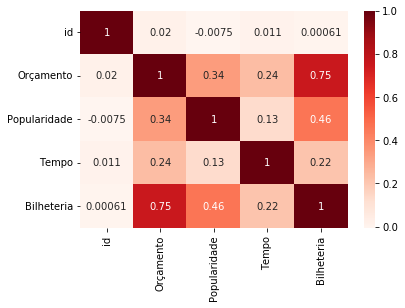

In [86]:
#Revenue = Receita de bilheteria // Exatamente o que precisamos prever no trabalho
#Usando gráfico do seaborn para visualizar a correlação dos dados de treino, notando que budget(orçamento dos filmes) influencia mais no revenue

sns.heatmap(treino_num.corr(), cmap='Reds', annot=True)

In [87]:
for i, e in enumerate(treino['Gênero'][:5]):
    print(i, e)

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


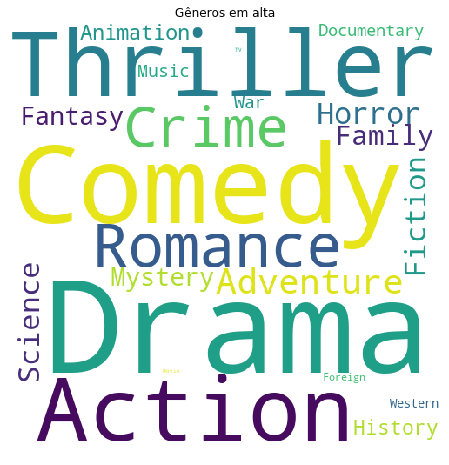

In [88]:

listagenero = list(treino['Gênero'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
plt.figure(figsize = (12, 8))
text = ' '.join([i for j in listagenero for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=500, height=500).generate(text)
plt.imshow(wordcloud)
plt.title('Gêneros em alta')
plt.axis("off")
plt.show()



In [89]:
Counter([i for j in listagenero for i in j]).most_common()

[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260),
 ('Fantasy', 232),
 ('Mystery', 225),
 ('Animation', 141),
 ('History', 132),
 ('Music', 100),
 ('War', 100),
 ('Documentary', 87),
 ('Western', 43),
 ('Foreign', 31),
 ('TV Movie', 1)]

In [90]:
dfgenero = pd.DataFrame(listagenero, columns=['Gênero','b','c','d','e','f','g'])
treino = treino.drop(columns=["Gênero"])
treino.insert(4,"Gênero",dfgenero['Gênero'],True)
treino.head()

,id,Coleção,Orçamento,Linguagem Original,Gênero,Titulo Original,Popularidade,Produtora,Tempo,Linguagem Falada,Titulo,Bilheteria
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,en,Comedy,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Hot Tub Time Machine 2,12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,en,Comedy,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]",113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Princess Diaries 2: Royal Engagement,95149435
2,3,{},3300000,en,Drama,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Whiplash,13092000
3,4,{},1200000,hi,Thriller,Kahaani,3.174936,{},122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Kahaani,16000000
4,5,{},0,ko,Action,마린보이,1.148070,{},118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Marine Boy,3923970


In [91]:
binario = pd.get_dummies(treino['Gênero'])
binariodf = pd.DataFrame(binario)
binariodf.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
for i, e in enumerate(teste['Gênero'][:5]):
    print(i, e)

0 [{'id': 12, 'name': 'Adventure'}, {'id': 16, 'name': 'Animation'}, {'id': 10751, 'name': 'Family'}, {'id': 14, 'name': 'Fantasy'}]
1 [{'id': 27, 'name': 'Horror'}, {'id': 878, 'name': 'Science Fiction'}]
2 [{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]
3 [{'id': 18, 'name': 'Drama'}, {'id': 10752, 'name': 'War'}, {'id': 9648, 'name': 'Mystery'}]
4 [{'id': 36, 'name': 'History'}, {'id': 99, 'name': 'Documentary'}]


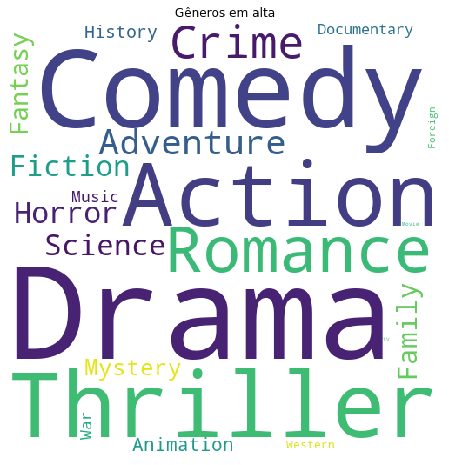

In [93]:
listagenero2 = list(teste['Gênero'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
plt.figure(figsize = (12, 8))
text2 = ' '.join([i for j in listagenero2 for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=500, height=500).generate(text)
plt.imshow(wordcloud)
plt.title('Gêneros em alta')
plt.axis("off")
plt.show()

In [94]:
Counter([i for j in listagenero2 for i in j]).most_common()

[('Drama', 2145),
 ('Comedy', 1577),
 ('Thriller', 1080),
 ('Action', 994),
 ('Romance', 864),
 ('Adventure', 677),
 ('Crime', 615),
 ('Science Fiction', 454),
 ('Horror', 434),
 ('Family', 415),
 ('Fantasy', 396),
 ('Mystery', 325),
 ('Animation', 241),
 ('Music', 167),
 ('History', 163),
 ('War', 143),
 ('Documentary', 134),
 ('Western', 74),
 ('Foreign', 53)]

In [95]:
dfgenero2 = pd.DataFrame(listagenero2, columns=['Gênero','b','c','d','e','f','g', 'h'])
teste = teste.drop(columns=["Gênero"])
teste.insert(4,"Gênero",dfgenero2['Gênero'],True)
teste.head()

,id,Coleção,Orçamento,Linguagem Original,Gênero,Titulo Original,Popularidade,Produtora,Tempo,Linguagem Falada,Titulo
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,ja,Adventure,ディアルガVSパルキアVSダークライ,3.851534,{},90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Pokémon: The Rise of Darkrai
1,3002,{},88000,en,Horror,Attack of the 50 Foot Woman,3.559789,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...",65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Attack of the 50 Foot Woman
2,3003,{},0,en,Comedy,Addicted to Love,8.085194,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Addicted to Love
3,3004,{},6800000,fr,Drama,Incendies,8.596012,"[{'name': 'TS Productions', 'id': 313}, {'name...",130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Incendies
4,3005,{},2000000,en,History,Inside Deep Throat,3.217680,{},92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Inside Deep Throat


In [96]:
binario2 = pd.get_dummies(teste['Gênero'])
binariodf2 = pd.DataFrame(binario2)
binariodf2.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [97]:
treino_num.insert(4,'Action',binariodf['Action'],True)
treino_num.insert(4,'Adventure',binariodf['Adventure'],True)
treino_num.insert(4,'Animation',binariodf['Animation'],True)
treino_num.insert(4,'Comedy',binariodf['Comedy'],True)
treino_num.insert(4,'Crime',binariodf['Crime'],True)
treino_num.insert(4,'Documentary',binariodf['Documentary'],True)
treino_num.insert(4,'Drama',binariodf['Drama'],True)
treino_num.insert(4,'Family',binariodf['Family'],True)
treino_num.insert(4,'Fantasy',binariodf['Fantasy'],True)
treino_num.insert(4,'Foreign',binariodf['Foreign'],True)
treino_num.insert(4,'History',binariodf['History'],True)
treino_num.insert(4,'Horror',binariodf['Horror'],True)
treino_num.insert(4,'Music',binariodf['Music'],True)
treino_num.insert(4,'Mystery',binariodf['Mystery'],True)
treino_num.insert(4,'Romance',binariodf['Romance'],True)
treino_num.insert(4,'Science Fiction',binariodf['Science Fiction'],True)
treino_num.insert(4,'TV Movie',binariodf['TV Movie'],True)
treino_num.insert(4,'Thriller',binariodf['Thriller'],True)
treino_num.insert(4,'War',binariodf['War'],True)
treino_num.insert(4,'Western',binariodf['Western'],True)
treino_num.head()

,id,Orçamento,Popularidade,Tempo,Western,War,Thriller,TV Movie,Science Fiction,Romance,...,Fantasy,Family,Drama,Documentary,Crime,Comedy,Animation,Adventure,Action,Bilheteria
0,1,14000000,6.575393,93.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,12314651
1,2,40000000,8.248895,113.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,95149435
2,3,3300000,64.299990,105.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,13092000
3,4,1200000,3.174936,122.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,16000000
4,5,0,1.148070,118.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3923970


In [98]:
treino_num['Tempo'] = treino_num['Tempo'].fillna(0)
treino_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3000 non-null   int64  
 1   Orçamento        3000 non-null   int64  
 2   Popularidade     3000 non-null   float64
 3   Tempo            3000 non-null   float64
 4   Western          3000 non-null   uint8  
 5   War              3000 non-null   uint8  
 6   Thriller         3000 non-null   uint8  
 7   TV Movie         3000 non-null   uint8  
 8   Science Fiction  3000 non-null   uint8  
 9   Romance          3000 non-null   uint8  
 10  Mystery          3000 non-null   uint8  
 11  Music            3000 non-null   uint8  
 12  Horror           3000 non-null   uint8  
 13  History          3000 non-null   uint8  
 14  Foreign          3000 non-null   uint8  
 15  Fantasy          3000 non-null   uint8  
 16  Family           3000 non-null   uint8  
 17  Drama         

In [99]:
teste.insert(4,'Action',binariodf2['Action'],True)
teste.insert(4,'Adventure',binariodf2['Adventure'],True)
teste.insert(4,'Animation',binariodf2['Animation'],True)
teste.insert(4,'Comedy',binariodf2['Comedy'],True)
teste.insert(4,'Crime',binariodf2['Crime'],True)
teste.insert(4,'Documentary',binariodf2['Documentary'],True)
teste.insert(4,'Drama',binariodf2['Drama'],True)
teste.insert(4,'Family',binariodf2['Family'],True)
teste.insert(4,'Fantasy',binariodf2['Fantasy'],True)
teste.insert(4,'Foreign',binariodf2['Foreign'],True)
teste.insert(4,'History',binariodf2['History'],True)
teste.insert(4,'Horror',binariodf2['Horror'],True)
teste.insert(4,'Music',binariodf2['Music'],True)
teste.insert(4,'Mystery',binariodf2['Mystery'],True)
teste.insert(4,'Romance',binariodf2['Romance'],True)
teste.insert(4,'Science Fiction',binariodf2['Science Fiction'],True)
teste.insert(4,'Thriller',binariodf2['Thriller'],True)
teste.insert(4,'War',binariodf2['War'],True)
teste.insert(4,'Western',binariodf2['Western'],True)
teste.head()

,id,Coleção,Orçamento,Linguagem Original,Western,War,Thriller,Science Fiction,Romance,Mystery,...,Animation,Adventure,Action,Gênero,Titulo Original,Popularidade,Produtora,Tempo,Linguagem Falada,Titulo
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,ja,0,0,0,0,0,0,...,0,1,0,Adventure,ディアルガVSパルキアVSダークライ,3.851534,{},90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Pokémon: The Rise of Darkrai
1,3002,{},88000,en,0,0,0,0,0,0,...,0,0,0,Horror,Attack of the 50 Foot Woman,3.559789,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...",65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Attack of the 50 Foot Woman
2,3003,{},0,en,0,0,0,0,0,0,...,0,0,0,Comedy,Addicted to Love,8.085194,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Addicted to Love
3,3004,{},6800000,fr,0,0,0,0,0,0,...,0,0,0,Drama,Incendies,8.596012,"[{'name': 'TS Productions', 'id': 313}, {'name...",130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Incendies
4,3005,{},2000000,en,0,0,0,0,0,0,...,0,0,0,History,Inside Deep Throat,3.217680,{},92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Inside Deep Throat


In [100]:
teste['Tempo'] = teste['Tempo'].fillna(0)
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4398 non-null   int64  
 1   Coleção             4398 non-null   object 
 2   Orçamento           4398 non-null   int64  
 3   Linguagem Original  4398 non-null   object 
 4   Western             4398 non-null   uint8  
 5   War                 4398 non-null   uint8  
 6   Thriller            4398 non-null   uint8  
 7   Science Fiction     4398 non-null   uint8  
 8   Romance             4398 non-null   uint8  
 9   Mystery             4398 non-null   uint8  
 10  Music               4398 non-null   uint8  
 11  Horror              4398 non-null   uint8  
 12  History             4398 non-null   uint8  
 13  Foreign             4398 non-null   uint8  
 14  Fantasy             4398 non-null   uint8  
 15  Family              4398 non-null   uint8  
 16  Drama 

In [101]:
#'Western', 'War', 'Thriller', 'TV Movie', 'Science Fiction', 'Romance', 'Mystery','Music', 'Horror', 'History', 'Foreign', 'Fantasy', 'Family', 'Drama','Documentary', 'Crime', 'Comedy', 'Animation', 'Adventure', 'Action'
treino_num.columns
x = treino_num[['Orçamento', 'Popularidade', 'Tempo', 'Western', 'War', 'Thriller', 'Science Fiction', 'Romance', 'Mystery','Music', 'Horror', 'History', 'Foreign', 'Fantasy', 'Family', 'Drama','Documentary', 'Crime', 'Comedy', 'Animation', 'Adventure', 'Action']]
y = treino_num['Bilheteria']

In [102]:
np.random.seed(0)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=4)
modelo = RandomForestRegressor(n_estimators=500)
modelo.fit(x_treino,y_treino)
#print('\n Coeficiente:', modelo.coef_)
#print('\n Intercpet', modelo.intercept_)
pred = modelo.predict(x_teste)
mean_absolute_error(pred,y_teste)


40838022.02145066

In [103]:
testeoficial = teste[['Orçamento','Popularidade','Tempo', 'Western', 'War', 'Thriller','Science Fiction', 'Romance', 'Mystery','Music', 'Horror', 'History', 'Foreign', 'Fantasy', 'Family', 'Drama','Documentary', 'Crime', 'Comedy', 'Animation', 'Adventure', 'Action']] 
bilheteriapred = modelo.predict(testeoficial)

In [ ]:
submission = pd.DataFrame({'id':teste.id,'revenue':bilheteriapred})
submission.to_csv('submission.csv', index=False)

In [ ]:
#lr = LogisticRegression()
#lr.fit(x_treino,y_treino)
#pred2 = lr.predict(x_teste)
#mean_absolute_error(pred2,y_teste)